## Analyze A/B Test Results

#### By Vedavyas Kamath <br>

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
# Load packages needed to complete the project
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
# Load the data into pandas dataframe and check if it looks fine:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [5]:
#Check dimensions of the dataframe:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [6]:
#Check for number of unique values:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [7]:
#Check for mean of successfully converted users:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
df.query('landing_page == "new_page" and group != "treatment"').count() 

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [9]:
df.query('group == "treatment" and landing_page != "new_page"').count() 

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

f. Do any of the rows have missing values?

In [10]:
#Check for missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
#The answer of the quiz was to remove all rows that we are not sure off
# put all treatment AND new_page into one dataframe

#Check for rows for treatment group and new page:
df2_treatment = df.query('group == "treatment" and landing_page == "new_page"')

In [12]:
# Check for rows for old page given to control group:
df2_control = df.query('group == "control" and landing_page == "old_page"')

In [36]:
# merge both dataframes:
df2 = df2_treatment.merge(df2_control, how='outer')

In [37]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [38]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [39]:
#To find number of repeated rows
sum(df2.user_id.duplicated())

1

In [40]:
#To see the row that is dupplicate
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [41]:
# See duplicate entries by searching for user_id:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [42]:
# https://stackoverflow.com/questions/13035764/remove-rows-with-duplicate-indices-pandas-dataframe-and-timeseries
#Removing the duplicate entry:
df2 = df2[~df2.user_id.duplicated(keep='first')]

In [43]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [45]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [46]:
#selecting all rows that belong to control group in a new control group dataframe:
df2_control1 = df2.query('group == "control"')
df2_control1.converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [47]:
#selecting all rows that belong to treatment group in a new treatment group dataframe:
df2_treatment1 = df2.query('group == "treatment"')
df2_treatment1.converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [48]:
#This given by count of entries in treatment group dataframe divided by total number of entries in parent dataframe:
len(df2_treatment1.index)/len(df2.index)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**ANSWER:**
> We can see that people in control group had a conversion rate of 12.04% whereas those in the treatment group had 11.88% which tells us that it is more likely that control group is converted. This maybe the case either because its true or there is some bias.
Thus, I feel there is no sufficient evidence that new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:**

Assuming that the old page is better unless the new page is proven to be better:<br>
   > Null Hypothesis : **$p_{old}$** >= **$p_{new}$** <br> Alternative Hypothesis : **$p_{old}$** < **$p_{new}$** 
   
Which also can be stated as:
   > Null Hypothesis : **$p_{old}$** - **$p_{new}$** >= 0 <br> Alternative Hypothesis : **$p_{old}$** - **$p_{new}$**  < 0  

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [98]:
converted_mean=df2.converted.mean()

In [99]:
p_new = converted_mean
print(p_new)

0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [100]:
p_old = converted_mean
print(p_old)

0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [96]:
#checking number of enries in parent dataframe with new page:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [97]:
#checking number of enries in parent dataframe with old page:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [151]:
#Simulating values for new pages using bootstrapping technique: with probability for value '1' being converted_mean and 
# probability for value'0' being (1-converted_mean):
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1-converted_mean), converted_mean])

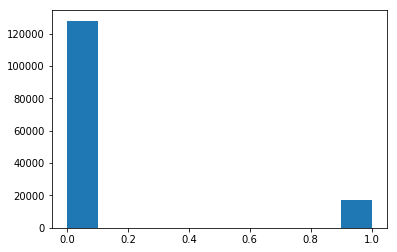

In [152]:
#Plot a histogram to check distribution.
plt.hist(new_page_converted);

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [110]:
#Simulating values for old pages using bootstrapping technique: with probability for value '1' being converted_mean and 
# probability for value'0' being (1-converted_mean):
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - converted_mean), converted_mean])

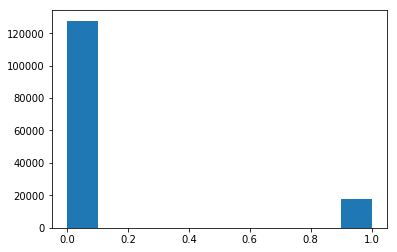

In [111]:
plt.hist(old_page_converted);

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [113]:
#Checking difference between means of new page and old page distributions:
new_page_converted.mean() - old_page_converted.mean()

-0.0016196937340222234

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [114]:
#Create a sampling distribution of the difference in proportions 10,000 times
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - converted_mean), converted_mean])
    old_page_converted =  np.random.choice([0, 1], size=n_old, p=[(1 - converted_mean), converted_mean])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [115]:
#view some elemetns:
p_diffs[0:3]

[-0.0007797376260126193, 0.0013676484831573882, 0.0005071560024675487]

In [116]:
#convert to numpy array for conveience:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

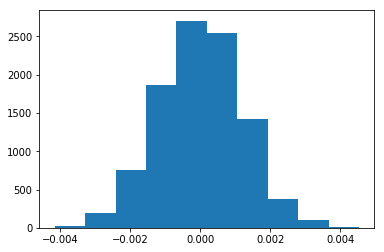

In [117]:
#Plotting to see how distribution looks:
plt.hist(p_diffs);

In [118]:
# calculate mean of difference of mean of old page and new page distributions:
p_diffs.mean()

6.066245226508911e-06

In [120]:
#Calculating the difference in means of old page and new page in actual observed data:
ab_data_diff = df2_treatment1.converted.mean() - df2_control1.converted.mean()
ab_data_diff

-0.0015782389853555567

In [121]:
#Checking for mean where simulated difference between old and new pages is more than difference observed in actual data:
(p_diffs > ab_data_diff).mean()

0.9054

In [122]:
#Checking for mean where simulated difference between old and new pages is lesser than difference observed in actual data:
(p_diffs < ab_data_diff).mean()

0.0946

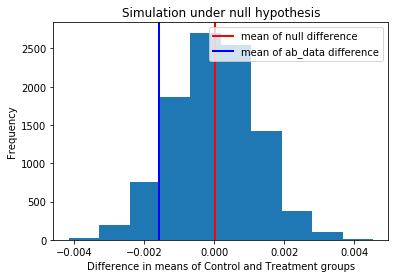

In [123]:
# low is the difference between treatment and control groups in actual data
low = ab_data_diff

# high is the difference between treatment and control groups in null hypothesis (simulated)
high = p_diffs.mean()

plt.hist(p_diffs);
plt.title('Simulation under null hypothesis')
plt.xlabel('Difference in means of Control and Treatment groups')
plt.ylabel('Frequency')
plt.axvline(x=high, color='r', linewidth=2, label='mean of null difference')
plt.axvline(x=low, color='b', linewidth=2, label='mean of ab_data difference')
plt.legend()

In [124]:
(p_diffs.mean()) - ab_data_diff

0.0015843052305820656

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [125]:
(p_diffs > ab_data_diff).mean()

0.9054

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**ANSWER:** <br>
The proportion of p_diffs that are greater than the actual observed difference in data is called p-value.
The probability of observing our statistic when null hypothesis is true is called p-value.
Large P-values suggest that we shouldn't move away from the Null Hypothesis and stick to it.
In this case we have p-value as 0.9054 which is high suggesting that we dont have evidence to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [126]:
#import the statsmodel package required to perform z-test:
import statsmodels.api as sm

#get the counts of users who were converted in control group and treatment groups respectively:
convert_old = df2.query('group == "control" & converted == 1')['converted'].count()
convert_new = df2.query('group == "treatment" & converted == 1')['converted'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [127]:
#Ran the ztest on data by following the documentation:
#LINK: http://www.statsmodels.org/0.6.1/generated/statsmodels.stats.proportion.proportions_ztest.html

sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**ANSWER:**

The p-value is again high (0.905) which is same as p-value calculated using bootstrapping method thereby suggesting that we do not have enough evidence to reject the Null Hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**ANSWER:**

We should ideally be using Logistic Regression in this considering the fact that our output variable has only 2 possible outcomes 'Converted' or 'Not Converted'.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [131]:
# Added dummy variable for values of 'landing_page' variable and an intercept
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2['intercept'] = 1
df2.sample(10)

,user_id,timestamp,group,landing_page,converted,ab_page,old_page,intercept
201038,944523,2017-01-18 15:02:29.321165,control,old_page,0,0,1,1
261554,738286,2017-01-04 03:45:09.096658,control,old_page,0,0,1,1
145042,802715,2017-01-13 10:03:20.610577,treatment,new_page,0,1,0,1
119860,860245,2017-01-21 08:38:52.245021,treatment,new_page,0,1,0,1
29767,921565,2017-01-05 12:19:12.144859,treatment,new_page,0,1,0,1
54988,635603,2017-01-17 21:49:36.824570,treatment,new_page,0,1,0,1
7596,940135,2017-01-18 04:35:47.410898,treatment,new_page,0,1,0,1
79702,888346,2017-01-13 12:43:24.657137,treatment,new_page,0,1,0,1
48488,928303,2017-01-23 04:05:12.604309,treatment,new_page,0,1,0,1
72586,641612,2017-01-04 13:21:57.520938,treatment,new_page,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [133]:
#Built logsitic regression model to see if there is a relationship between the page_type and user being converted:
# setting old_page as the base line category
logistic_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = logistic_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [134]:
# Evaluated the result and performance of model:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 29 Oct 2019   Pseudo R-squ.:               8.077e-06
Time:                        15:50:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**ANSWER:**
The p-value for ab_page that we got from the regression model is 0.190.

The reason for difference in p-value found using regression model and p-value calculated in **Part II** of the analysis is because the p-value calculated previously corresponded to a one-tailed hypothesis test whereas the test implemented by a regression model is a 2-sided test. 

A high p-value for ab_page in the regression model means that there is no correlation between the landing page type and the conversion rate. This implies that p_new is equal to p_old which is nothing but the null hypothesis of a two tailed test. <br><br>
So the null and alternative hypotheses for the 2-sided test are:

   > Null Hypothesis : **$p_{old}$** = **$p_{new}$** <br> Alternative Hypothesis : **$p_{old}$** != **$p_{new}$** 



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**ANSWER:**
It is a good idea to consider adding other variables in the regression model as it may reveal some new sort of co-relation. The only disadvantage of doing this is more complexity. There also maybe a chance that new newly added variables may not have any impact on the target variable.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [136]:
# Load the data as a pandas dataframe and view first 5 rows to check:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [143]:
# Megre the counties data with the main dataset by matching the user_id column:
df3 = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [144]:
#Find distinct country values in county column
df3.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [145]:
#create dummy variables for 3 possible values in country column:
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])
df3.head()

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [150]:
# Create and evaluate the model to check for relation between country and and converted columns: 
# setting US as the base line category
logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'UK']])
result = logit_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 29 Oct 2019   Pseudo R-squ.:               1.521e-05
Time:                        16:40:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**INSIGHT**: 
We see that p-values for both countries are greater than an $\alpha$ level of 0.05 and so we fail to reject Null hypothesis again and can conclude that on its own there is no significant effect of country variable on conversion rate for both pages.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [153]:
# Creating interactions columns for different combinations of values across variables:
df3['CA_page'] = df3['CA'] * df3['ab_page']
df3['UK_page'] = df3['UK'] * df3['ab_page']
df3.head()

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept,CA,UK,US,CA_page,UK_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,1


In [155]:
df3.sample(10)

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept,CA,UK,US,CA_page,UK_page
user_id,,,,,,,,,,,,,
800032,UK,2017-01-03 08:33:51.740761,control,old_page,0,0,1,1,0,1,0,0,0
807556,US,2017-01-17 17:59:03.741843,control,old_page,0,0,1,1,0,0,1,0,0
683867,US,2017-01-15 17:49:00.613273,control,old_page,0,0,1,1,0,0,1,0,0
735061,US,2017-01-23 07:13:59.561123,treatment,new_page,0,1,0,1,0,0,1,0,0
853985,US,2017-01-06 21:37:44.508991,control,old_page,0,0,1,1,0,0,1,0,0
913076,US,2017-01-14 13:39:58.738328,control,old_page,0,0,1,1,0,0,1,0,0
836644,UK,2017-01-19 06:51:15.382752,control,old_page,0,0,1,1,0,1,0,0,0
731153,US,2017-01-18 17:29:56.298832,treatment,new_page,0,1,0,1,0,0,1,0,0
823974,US,2017-01-02 22:41:08.393717,control,old_page,0,0,1,1,0,0,1,0,0


In [156]:
# Now building and evaluating a logistic regression model while considering the page, country as well as 
# interaction variables of both
logit_mod = sm.Logit(df3['converted'], df3[['intercept','ab_page', 'CA', 'UK','CA_page','UK_page']])
result = logit_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 30 Oct 2019   Pseudo R-squ.:               3.482e-05
Time:                        01:35:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

**INSIGHT:**
We see that none of the variables have a significant impact on the conversion rate of the page.
As a result we fail to reject the null hypothesis and conclude that we do not have enough evidence to state that there is an interaction between country and page type that may predict whether a user gets converted or not.
This is as good as saying that we cannot be sure that the new page yeilds a better conversion rate of users than the old page.
This maybe because the conversion rate is not dependant on the design of the page but maybe because of the content. This can be known only after further digging into the experiment and trying out different kind of changes. Thus, it would be advisable for the e-commerce website to run the experiment further as we do not have sufficient evidence to say that the new page is better than the old.